In [1]:
# import required libraries
import os
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mplsoccer import Pitch, VerticalPitch
import matplotlib_inline
from matplotlib import cm
import matplotlib_inline
import seaborn as sns
#matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

In [2]:
df = pd.read_csv("merged_match_results.csv")

In [3]:
df.head()

,wk,date,time,home,homegoals,away,awaygoals,home_xg,away_xg,home_pen_xg,away_pen_xg,home_np_xg,away_np_xg
0,1,2021-04-10,15:00,Malmö FF,3,Hammarby,2,3.081973,0.284890,0.725091,0.0,2.356882,0.284890
1,1,2021-04-10,17:30,Örebro,0,IFK Göteborg,0,0.630045,0.747871,0.000000,0.0,0.630045,0.747871
2,1,2021-04-11,15:00,Halmstad,1,BK Häcken,0,1.014930,0.405163,0.000000,0.0,1.014930,0.405163
3,1,2021-04-11,15:00,Mjällby AIF,0,Varbergs BoIS FC,0,1.517195,0.707990,0.000000,0.0,1.517195,0.707990
4,1,2021-04-11,17:30,IF Elfsborg,0,Djurgården,2,0.841527,0.221132,0.000000,0.0,0.841527,0.221132


In [86]:
team_df.head()

,wk,date,time,home,homegoals,away,awaygoals,home_xg,away_xg,home_pen_xg,away_pen_xg,home_np_xg,away_np_xg
0,1,2021-04-10,15:00,Malmö FF,3,Hammarby,2,3.081973,0.284890,0.725091,0.0,2.356882,0.284890
11,2,2021-04-18,15:00,BK Häcken,1,Malmö FF,2,0.984161,1.164076,0.000000,0.0,0.984161,1.164076
21,3,2021-04-25,17:30,Malmö FF,1,Östersund,1,4.019793,0.587811,0.000000,0.0,4.019793,0.587811
31,4,2021-05-03,18:30,Djurgården,3,Malmö FF,1,1.675518,0.458632,0.000000,0.0,1.675518,0.458632
38,5,2021-05-09,17:30,Malmö FF,3,Varbergs BoIS FC,2,2.307627,0.590865,0.000000,0.0,2.307627,0.590865


In [128]:
all_xg_for = pd.concat([df['home_np_xg'], df['away_np_xg']])
all_xg_against = pd.concat([df['away_np_xg'], df['home_np_xg']])

In [5]:
df['home'].unique()

array(['Malmö FF', 'Örebro', 'Halmstad', 'Mjällby AIF', 'IF Elfsborg',
       'IFK Norrköping FK', 'AIK', 'Kalmar FF', 'Hammarby',
       'Degerfors IF', 'Östersund', 'BK Häcken', 'Djurgården',
       'IK Sirius FK', 'IFK Göteborg', 'Varbergs BoIS FC'], dtype=object)

In [101]:
team_color = {'Malmö FF':['skyblue', 'white'], 
              'AIK':['darkblue', 'yellow'],  
              'Djurgården':['skyblue', 'darkblue'], 
              'IF Elfsborg':['yellow', 'black'], 
              'Hammarby':['white', 'darkgreen'],
              'Kalmar FF':['red', 'white'], 
              'IFK Norrköping FK':['white', 'blue'], 
              'IFK Göteborg':['blue', 'skyblue'], 
              'Mjällby AIF':['#FCDF51', 'black'],
              'Varbergs BoIS FC':['#53B663', 'black'], 
              'IK Sirius FK':['blue', 'black'], 
              'BK Häcken':['black', '#FFF275'], 
              'Degerfors IF':['white', 'red'],
              'Halmstad':['#6B91EB', 'black'], 
              'Örebro':['white', 'black'], 
              'Östersund':['red', 'black']}

In [6]:
team_ranks = ['Malmö FF', 'AIK', 'Djurgården', 'IF Elfsborg', 'Hammarby',
'Kalmar FF', 'IFK Norrköping FK', 'IFK Göteborg', 'Mjällby AIF',
'Varbergs BoIS FC', 'IK Sirius FK', 'BK Häcken', 'Degerfors IF',
'Halmstad', 'Örebro', 'Östersund']

In [ ]:
ax[i, j].grid(color='black', ls = '-.', lw = 0.25)

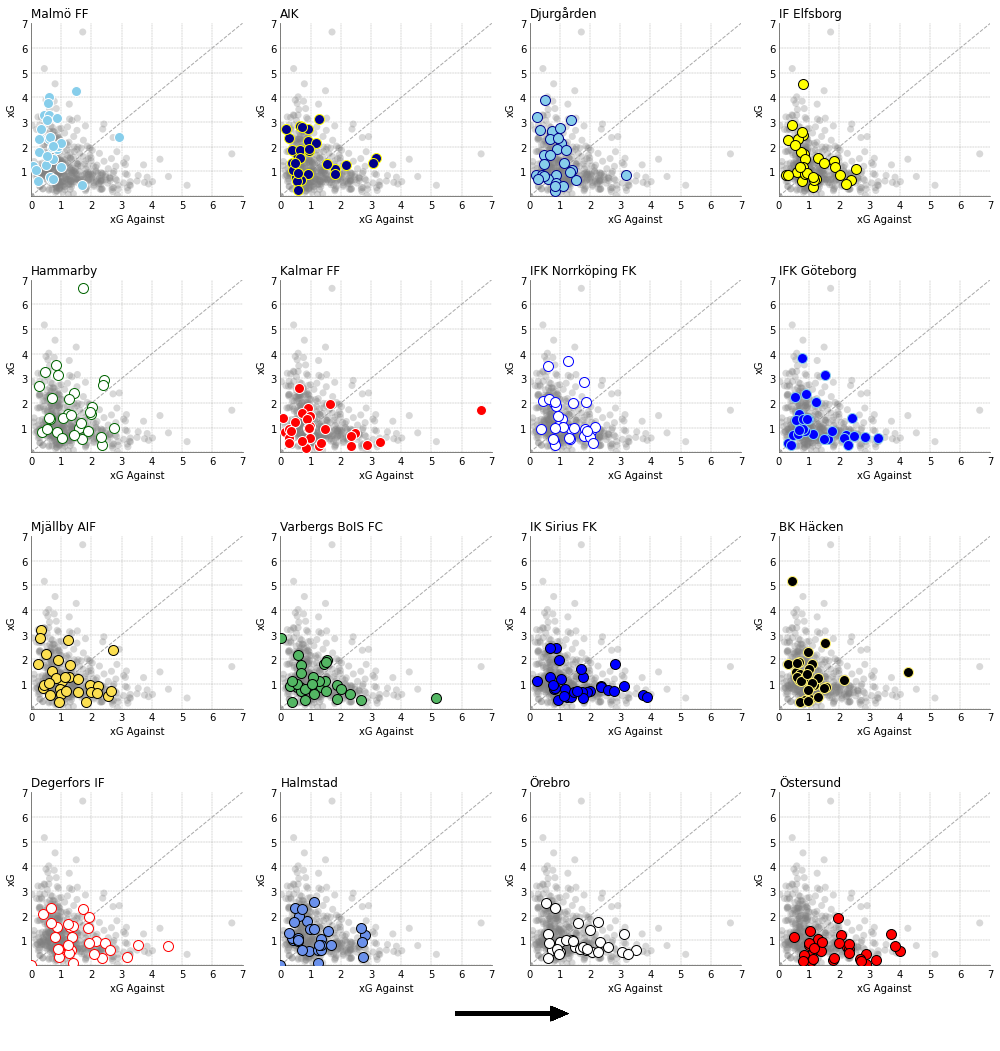

In [228]:
fig, ax = plt.subplots(nrows = 4, ncols = 4, figsize = (14, 14))

fig.set_facecolor("white")
#EFEFF0
#FDFFEE
ind = 0
for i in range(4):
    for j in range(4):
        

        
        # grid settings
        ax[i, j].grid(color='#62625F', ls = '-.', lw = 0.25, zorder = 0)

        # face color of axis and figure
        ax[i, j].set_facecolor("white")
        
        # plot dashed line 
        x = np.array([0, 7])
        y = np.array([0, 7])
        ax[i, j].plot(x, y, c = 'darkgray', ls = '--', lw = 1, zorder = 3)

        # data filtering steps: 
        # 1.take a team from a list and filter data frame 'team_df'
        team_df = df[(df['home'] == team_ranks[ind]) | (df['away'] == team_ranks[ind])]
        
        # 2. filter non-penalty xG for
        team_df[team_df['home'] == team_ranks[ind]]['home_np_xg']
        team_df[team_df['away'] == team_ranks[ind]]['away_np_xg']
        xg_for = pd.concat([team_df[team_df['home'] == team_ranks[ind]]['home_np_xg'],
                 team_df[team_df['away'] == team_ranks[ind]]['away_np_xg']])
        
        # 3. filter non-penalty xG against
        team_df[team_df['home'] == team_ranks[ind]]['away_np_xg']
        team_df[team_df['away'] == team_ranks[ind]]['home_np_xg']
        xg_against = pd.concat([team_df[team_df['home'] == team_ranks[ind]]['away_np_xg'], 
                     team_df[team_df['away'] == team_ranks[ind]]['home_np_xg']])

        
        ax[i, j].scatter(all_xg_against, all_xg_for, c = 'gray', alpha = 0.3, s = 50, edgecolor = 'none', zorder = 3)
        ax[i, j].scatter(xg_against, xg_for, s = 100, c = team_color[team_ranks[ind]][0], 
                         edgecolor = team_color[team_ranks[ind]][1], zorder = 3)

        # set limit for x and y axis
        ax[i, j].set_xlim(0, 7)
        ax[i, j].set_ylim(0, 7)
        ax[i, j].set_xticks(np.arange(0, 8, 1))
        ax[i, j].set_xticks(np.arange(0, 8, 1))
        
        # remove tick lines from both axis
        #ax.xaxis.set_tick_params(length = 0)
        #ax.yaxis.set_tick_params(length = 0)
        ax[i, j].tick_params(length = 0)

        # remove '0' on y-axis
        ax[i, j].yaxis.get_major_ticks()[0].label1.set_visible(False)
        # remove top and right spines
        ax[i, j].spines[['top', 'right']].set_visible(False)
        
        # spines and ticks color
        spines_color = '#62625F'
        ax[i, j].spines['bottom'].set_color(spines_color)
        ax[i, j].spines['top'].set_color(spines_color) 
        ax[i, j].spines['right'].set_color(spines_color)
        ax[i, j].spines['left'].set_color(spines_color)
        #ax[i, j].tick_params(colors = spines_color, which = 'both')

        # font dictionary
        font3 = {'family': 'monospace', 'weight': 'bold', 'size': 14}
        # axis labels
        ax[i, j].set_xlabel('xG Against')
        ax[i, j].set_ylabel('xG')
        ax[i, j].set_title(team_ranks[ind], loc = 'left')
        #ax[i, j].xaxis.label.set_color(spines_color)
        #ax[i, j].yaxis.label.set_color(spines_color)
        
        # remove topmost and rightmost gridlines:
        # retrieve all x and y gridlines
        y_gridlines = ax[i, j].get_ygridlines()
        x_gridlines = ax[i, j].get_xgridlines()
        # select topmost and rightmost and remove them
        y_last = y_gridlines[-1]
        y_last.set_visible(False)
        x_last = x_gridlines[-1]
        x_last.set_visible(False)
        
        # X axis 
        arrow_ax = fig.add_axes([0.30, -0.04, 0.35, 0.3]) # X, Y, width, height

        arrow_ax.arrow(0.45, 0.1, 0.30, 0, head_width=0.03, head_length=0.03, linewidth=4, 
               color = 'black', length_includes_head = True)
        arrow_ax.set_ylim(0, 1)
        arrow_ax.set_xlim(0, 1)
        arrow_ax.set_axis_off()
        
        # Y axis 
        arrow_ax = fig.add_axes([0.30, -0.04, 0.35, 0.3]) # X, Y, width, height

        arrow_ax.arrow(0.45, 0.1, 0.30, 0, head_width=0.03, head_length=0.03, linewidth=4, 
               color = 'black', length_includes_head = True)
        arrow_ax.set_ylim(0, 1)
        arrow_ax.set_xlim(0, 1)
        arrow_ax.set_axis_off()
        
        
        
        # update index for list of teams
        ind = ind + 1

plt.tight_layout(h_pad = 4)
plt.show()
fig.savefig('xg_subplots.png', dpi = 300, transparent = False)

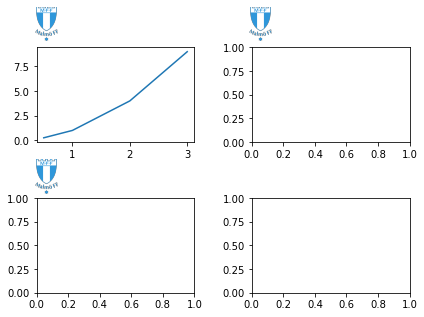

In [237]:
import matplotlib.image as image

# put a new axes where you want the image to appear
im = image.imread("club_logos/malmoff.png")

fig, ax = plt.subplots(nrows = 2, ncols = 2)

# plotting data
x = np.array([0.5, 1, 2, 3])
y = x**2
ax[0, 0].plot(x, y)

# face colors
fig.set_facecolor('white')
ax[0, 0].set_facecolor('white')

# image settings:
# add axis (x, y, width, height)
imax = fig.add_axes([0.055, 0.97, 0.12, 0.12])
# remove ticks & the box from imax 
imax.set_axis_off()
# print the logo with aspect="equal" to avoid distorting the logo
imax.imshow(im, aspect = "equal")


# image settings:
# add axis (x, y, width, height)
im_ax = fig.add_axes([0.055, 0.44, 0.12, 0.12])
# remove ticks & the box from imax 
im_ax.set_axis_off()
# print the logo with aspect="equal" to avoid distorting the logo
im_ax.imshow(im, aspect = "equal", )

# image settings:
# add axis (x, y, width, height)
im_ax = fig.add_axes([0.55, 0.97, 0.12, 0.12])
# remove ticks & the box from imax 
im_ax.set_axis_off()
# print the logo with aspect="equal" to avoid distorting the logo
im_ax.imshow(im, aspect = "equal", )


plt.tight_layout(w_pad=2, h_pad=3.5)
plt.show()

fig.savefig('test.png', dpi = 300, transparent = False, bbox_inches='tight')

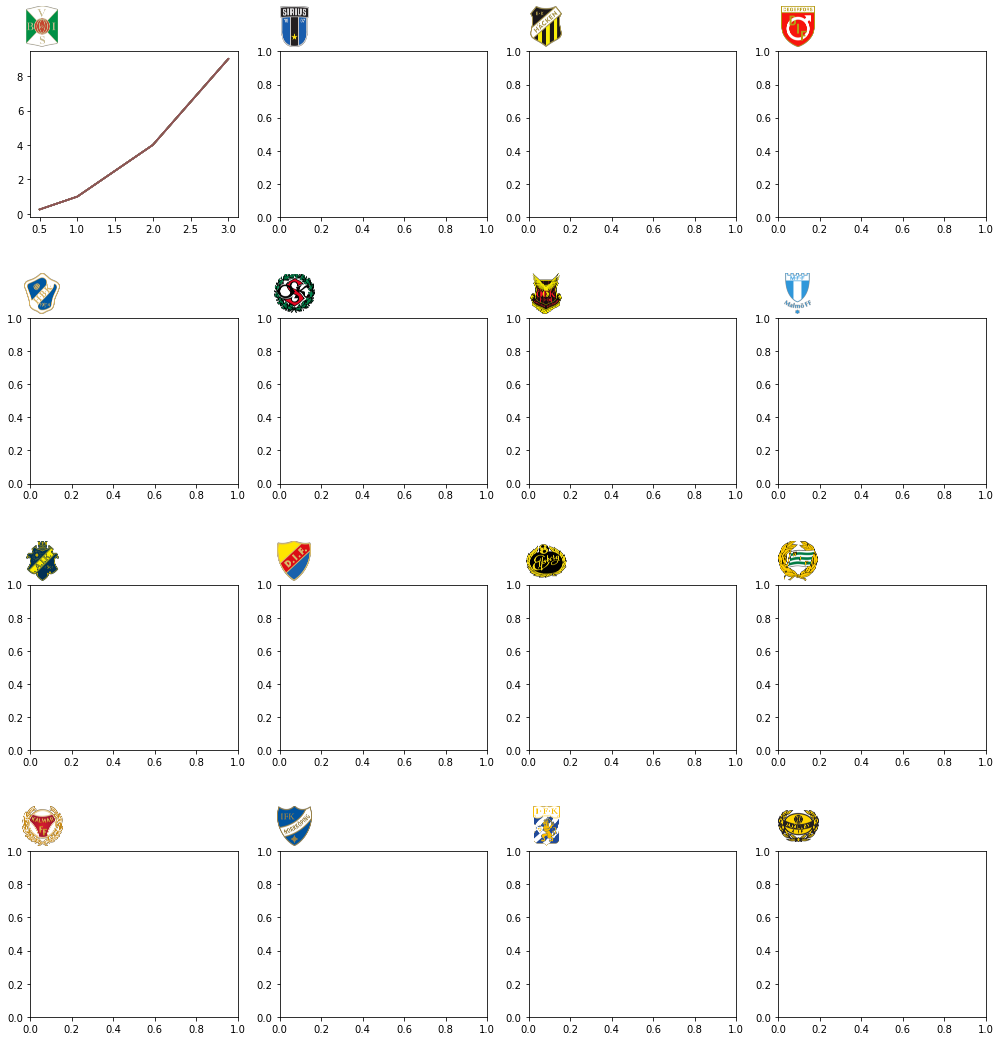

In [324]:
fig, ax = plt.subplots(nrows = 4, ncols = 4, figsize = (14, 14))

# image settings:
# image coordinates (origin to reassign to initial) and xy to reassign after each iteration
origin_xy = np.array([0.025, 0.99, 0.04, 0.04])
xy = np.array([0.025, 0.99, 0.04, 0.04])
# steps for coordinates
dx = np.array([0.25])
dy = np.array([-0.265, -0.265, -0.263, -0.25 ])

files = os.listdir('club_logos/')
ind = 0
for i in range(4):
    for j in range(4):
        
        # import image
        im = image.imread("club_logos/" + files[ind])
        
        # plotting data
        x = np.array([0.5, 1, 2, 3])
        y = x**2
        ax[0, 0].plot(x, y)

        # face colors
        fig.set_facecolor('white')
        ax[0, 0].set_facecolor('white')

        # image settings:
        # add axis (x, y, width, height)
        imax = fig.add_axes(xy)
        # remove ticks & the box from imax 
        imax.set_axis_off()
        # print the logo with aspect="equal" to avoid distorting the logo
        imax.imshow(im, aspect = "equal")

        # reassign step for image coordinate
        xy[0] = xy[0] + dx
        
        # index
        ind = ind + 1
        
    # reassign step for image coordinate
    xy[0] = origin_xy[0]
    xy[1] = xy[1] + dy[i]

plt.tight_layout(h_pad=8)
plt.show()
fig.savefig('test.png', dpi = 300, transparent = False, bbox_inches='tight')